In [21]:
import fastai.vision.all
import fastai.data.all
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import time

# Torch Tensor

## shape and view

In [3]:
# n_batch= 1
n_batch= 4

In [4]:
x= torch.tensor(np.zeros((n_batch,3,32,32))).float()

In [5]:
x.shape

torch.Size([4, 3, 32, 32])

In [6]:
x[0].numel()

3072

In [7]:
x.view(x.size(0), -1).shape

torch.Size([4, 3072])

In [8]:
l=torch.nn.Linear(x[0].numel(), 10)
l

Linear(in_features=3072, out_features=10, bias=True)

In [9]:
l(x[0].view(-1))

tensor([-0.0056, -0.0100, -0.0127, -0.0129, -0.0083, -0.0172,  0.0138,  0.0165,
         0.0113, -0.0037], grad_fn=<AddBackward0>)

In [10]:
l(x.view(x.size(0), -1))

tensor([[-0.0056, -0.0100, -0.0127, -0.0129, -0.0083, -0.0172,  0.0138,  0.0165,
          0.0113, -0.0037],
        [-0.0056, -0.0100, -0.0127, -0.0129, -0.0083, -0.0172,  0.0138,  0.0165,
          0.0113, -0.0037],
        [-0.0056, -0.0100, -0.0127, -0.0129, -0.0083, -0.0172,  0.0138,  0.0165,
          0.0113, -0.0037],
        [-0.0056, -0.0100, -0.0127, -0.0129, -0.0083, -0.0172,  0.0138,  0.0165,
          0.0113, -0.0037]], grad_fn=<AddmmBackward>)

## cat (concatenate) and stack

In [19]:
x1= torch.from_numpy(np.array([2,3,4])).float()
x2= torch.from_numpy(np.array([10,22,12])).float()
print(f'x1={x1}')
print(f'x2={x2}')
print(f'torch.cat={torch.cat((x1,x2),axis=0)}')
print(f'torch.stack={torch.stack((x1,x2),axis=0)}')

x1=tensor([2., 3., 4.])
x2=tensor([10., 22., 12.])
torch.cat=tensor([ 2.,  3.,  4., 10., 22., 12.])
torch.stack=tensor([[ 2.,  3.,  4.],
        [10., 22., 12.]])


# FastAI DataBlock and DataLoaders
Ref.
https://docs.fast.ai/tutorial.datablock.html

## DataBlock

In [11]:
X= np.concatenate((np.linspace(-1,1,11).reshape(-1,1), np.linspace(0,1,11).reshape(-1,1)),axis=1)
X

array([[-1. ,  0. ],
       [-0.8,  0.1],
       [-0.6,  0.2],
       [-0.4,  0.3],
       [-0.2,  0.4],
       [ 0. ,  0.5],
       [ 0.2,  0.6],
       [ 0.4,  0.7],
       [ 0.6,  0.8],
       [ 0.8,  0.9],
       [ 1. ,  1. ]])

In [12]:
Y= np.dot(X,np.array([1,1])).reshape(-1,1)
Y

array([[-1. ],
       [-0.7],
       [-0.4],
       [-0.1],
       [ 0.2],
       [ 0.5],
       [ 0.8],
       [ 1.1],
       [ 1.4],
       [ 1.7],
       [ 2. ]])

In [13]:
# X.reshape(-1,1,2)
# Y.reshape(-1,1,1)
# np.concatenate((X.reshape(-1,1,2),Y.reshape(-1,1,1)),axis=1) <-- Does not work.
np.array([ [[1,1],[1,]], [[1,1],[1,]]])  # <-- Does not work.

/home/akihikoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


array([[list([1, 1]), list([1])],
       [list([1, 1]), list([1])]], dtype=object)

In [14]:
D=[[x,y] for x,y in zip(X,Y)]
#D=sum([[x,y] for x,y in zip(X,Y)], [])
D

[[array([-1.,  0.]), array([-1.])],
 [array([-0.8,  0.1]), array([-0.7])],
 [array([-0.6,  0.2]), array([-0.4])],
 [array([-0.4,  0.3]), array([-0.1])],
 [array([-0.2,  0.4]), array([0.2])],
 [array([0. , 0.5]), array([0.5])],
 [array([0.2, 0.6]), array([0.8])],
 [array([0.4, 0.7]), array([1.1])],
 [array([0.6, 0.8]), array([1.4])],
 [array([0.8, 0.9]), array([1.7])],
 [array([1., 1.]), array([2.])]]

In [15]:
dblock= fastai.vision.all.DataBlock()

In [16]:
dsets= dblock.datasets(D)

In [17]:
dsets.train

(#9) [([array([0.8, 0.9]), array([1.7])], [array([0.8, 0.9]), array([1.7])]),([array([-0.4,  0.3]), array([-0.1])], [array([-0.4,  0.3]), array([-0.1])]),([array([1., 1.]), array([2.])], [array([1., 1.]), array([2.])]),([array([0. , 0.5]), array([0.5])], [array([0. , 0.5]), array([0.5])]),([array([-0.6,  0.2]), array([-0.4])], [array([-0.6,  0.2]), array([-0.4])]),([array([-0.2,  0.4]), array([0.2])], [array([-0.2,  0.4]), array([0.2])]),([array([-1.,  0.]), array([-1.])], [array([-1.,  0.]), array([-1.])]),([array([-0.8,  0.1]), array([-0.7])], [array([-0.8,  0.1]), array([-0.7])]),([array([0.6, 0.8]), array([1.4])], [array([0.6, 0.8]), array([1.4])])]

In [18]:
dsets.valid

(#2) [([array([0.2, 0.6]), array([0.8])], [array([0.2, 0.6]), array([0.8])]),([array([0.4, 0.7]), array([1.1])], [array([0.4, 0.7]), array([1.1])])]

In [19]:
dsets.train[0]

([array([0.8, 0.9]), array([1.7])], [array([0.8, 0.9]), array([1.7])])

### DataBlock Summary

イマイチ使い方がよくわからん．

決まりきったデータセット（画像，クラス分類，etc.）にしか対応してないのか？

## DataLoaders
ref. https://docs.fast.ai/tutorial.siamese.html

In [20]:
X= np.concatenate((np.linspace(-1,1,11).reshape(-1,1), np.linspace(0,1,11).reshape(-1,1)),axis=1)
Y= np.dot(X,np.array([1,1])).reshape(-1,1)
X,Y

(array([[-1. ,  0. ],
        [-0.8,  0.1],
        [-0.6,  0.2],
        [-0.4,  0.3],
        [-0.2,  0.4],
        [ 0. ,  0.5],
        [ 0.2,  0.6],
        [ 0.4,  0.7],
        [ 0.6,  0.8],
        [ 0.8,  0.9],
        [ 1. ,  1. ]]),
 array([[-1. ],
        [-0.7],
        [-0.4],
        [-0.1],
        [ 0.2],
        [ 0.5],
        [ 0.8],
        [ 1.1],
        [ 1.4],
        [ 1.7],
        [ 2. ]]))

In [21]:
# TEST
#A way of randomly splid a dataset into two datasets.
data_x= torch.autograd.Variable(torch.from_numpy(X).float())
# np.random.permutation works, but for using a seed,
idxes= np.random.RandomState(seed=42).permutation(data_x.shape[0])
print(f'Random indexes: {idxes}')
test_ratio= 0.2
N_train= round(data_x.shape[0]*(1.-test_ratio))
print(f'N_train: {N_train}')
data_x[idxes[:N_train]], data_x[idxes[N_train:]]

Random indexes: [ 5  0  9 10  2  1  8  4  7  3  6]
N_train: 9


(tensor([[ 0.0000,  0.5000],
         [-1.0000,  0.0000],
         [ 0.8000,  0.9000],
         [ 1.0000,  1.0000],
         [-0.6000,  0.2000],
         [-0.8000,  0.1000],
         [ 0.6000,  0.8000],
         [-0.2000,  0.4000],
         [ 0.4000,  0.7000]]),
 tensor([[-0.4000,  0.3000],
         [ 0.2000,  0.6000]]))

In [22]:
#Convert NumPy data to torch variables.
data_x= torch.autograd.Variable(torch.from_numpy(X).float())
data_y= torch.autograd.Variable(torch.from_numpy(Y).float())
#Make torch dataset and loader.
test_ratio= 0.2
idxes= np.random.RandomState(seed=42).permutation(data_x.shape[0])
N_train= round(data_x.shape[0]*(1.-test_ratio))
dset_train= torch.utils.data.TensorDataset(data_x[idxes[:N_train]], data_y[idxes[:N_train]])
dset_test= torch.utils.data.TensorDataset(data_x[idxes[N_train:]], data_y[idxes[N_train:]])
dl_train= torch.utils.data.DataLoader(
      dataset=dset_train,
      batch_size=2,
      shuffle=True,
      num_workers=2)
dl_test= torch.utils.data.DataLoader(
      dataset=dset_train,
      batch_size=2,
      shuffle=True,
      num_workers=2)

In [23]:
print(f'len(dset_train): {len(dset_train)}')
print(f'len(dset_test): {len(dset_test)}')
print(f'dset_train[0]: {dset_train[0]}')
print(f'dset_test[0]: {dset_test[0]}')
print(f'next(iter(dl_train)): {next(iter(dl_train))}')
# print(f': {}')

len(dset_train): 9
len(dset_test): 2
dset_train[0]: (tensor([0.0000, 0.5000]), tensor([0.5000]))
dset_test[0]: (tensor([-0.4000,  0.3000]), tensor([-0.1000]))
next(iter(dl_train)): [tensor([[-0.6000,  0.2000],
        [ 0.4000,  0.7000]]), tensor([[-0.4000],
        [ 1.1000]])]


In [24]:
#torch dataloaders to fastai DataLoaders.
class DataLoaders(object):
  def __init__(self, *dls): self.train, self.valid= dls
dls= DataLoaders(dl_train, dl_test)    # <-- Although this is introduced in a fastai textbook, it doesn't work.

In [25]:
#This is a better way to create fastai dataloaders from torch dataloaders.
dls= fastai.data.core.DataLoaders.from_dsets(dset_train, dset_test)

In [26]:
dls.valid_ds[0]

(tensor([-0.4000,  0.3000]), tensor([-0.1000]))

## Display Image Array with FastAI

### For FastAI Datasets & DataLoaders

In [97]:
path= fastai.vision.all.untar_data(fastai.vision.all.URLs.CIFAR)
dblock= fastai.vision.all.DataBlock(blocks=(fastai.vision.all.ImageBlock(), fastai.vision.all.CategoryBlock()),
                                    get_items=fastai.vision.all.get_image_files,
                                    get_y=fastai.vision.all.parent_label )
dsets= dblock.datasets(path)
dls= dblock.dataloaders(path, bs=64)
dsets.vocab

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

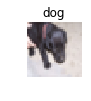

In [98]:
img= dsets[0][0]
img.show(title=dsets.vocab[dsets[0][1]])

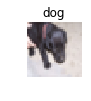

In [99]:
dsets.show(dsets[0])

In [100]:
# dls.show_batch()
# AttributeError: 'Tensor' object has no attribute 'show'

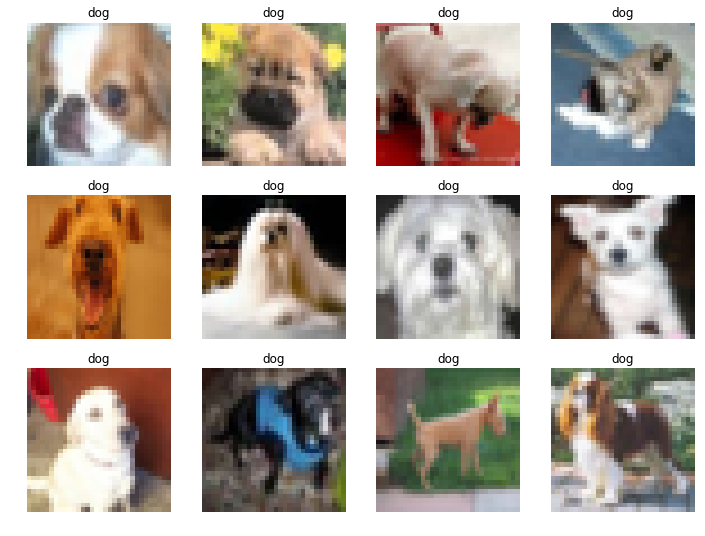

In [101]:
# x: Datasets
def show_grid(x, imgs, labels, ctxs=None, max_n=12, nrows=None, ncols=4, figsize=None, **kwargs):
    # if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = fastai.vision.all.get_grid(min(len(imgs), max_n), nrows=None, ncols=ncols, figsize=figsize)
    for ctx,img,label in zip(ctxs,imgs,labels):
        # x.show((img,label), ctx=ctx)
        i= img.clamp(0,1) if isinstance(img,torch.Tensor) else img
        t= x.vocab[label] if not isinstance(label,str) else str(label)
        fastai.vision.all.show_image(i, title=t, ctx=ctx, **kwargs)

# max_n, ncols= 24, 6
# figsize= (ncols*6, max_n//ncols * 3)
# ctxs= fastai.vision.all.get_grid(min(len(dsets), max_n), nrows=None, ncols=ncols, figsize=figsize)
# for i,ctx in enumerate(ctxs):
#     dsets.show(dsets[i], ctx=ctx)

show_grid(dsets, list(zip(*dsets[1000:1020]))[0], list(zip(*dsets[1000:1020]))[1])

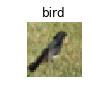

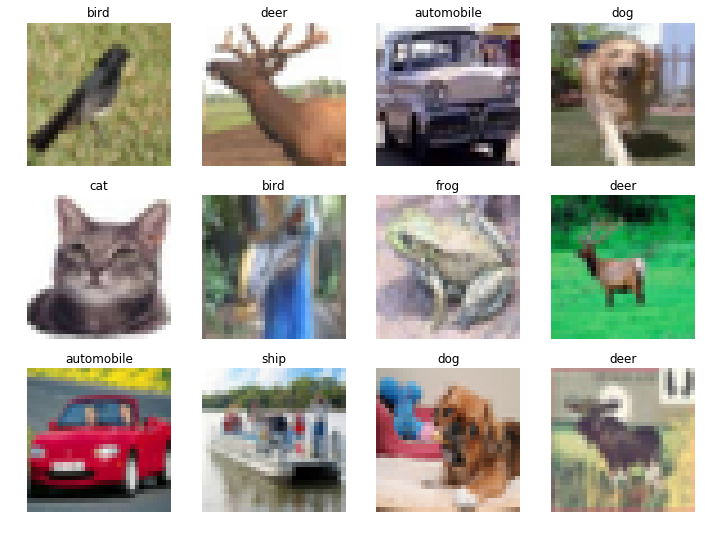

In [102]:
# dls.one_batch()[0][0].show()
b= dls.one_batch()
# dsets.vocab

dsets.show([b[0][0],b[1][0]])

show_grid(dsets, b[0], b[1])


[(PILImage mode=RGB size=32x32, TensorCategory(7)), (PILImage mode=RGB size=32x32, TensorCategory(3)), (PILImage mode=RGB size=32x32, TensorCategory(2)), (PILImage mode=RGB size=32x32, TensorCategory(7)), (PILImage mode=RGB size=32x32, TensorCategory(0)), (PILImage mode=RGB size=32x32, TensorCategory(3)), (PILImage mode=RGB size=32x32, TensorCategory(8)), (PILImage mode=RGB size=32x32, TensorCategory(5)), (PILImage mode=RGB size=32x32, TensorCategory(2)), (PILImage mode=RGB size=32x32, TensorCategory(9)), (PILImage mode=RGB size=32x32, TensorCategory(1)), (PILImage mode=RGB size=32x32, TensorCategory(7))]


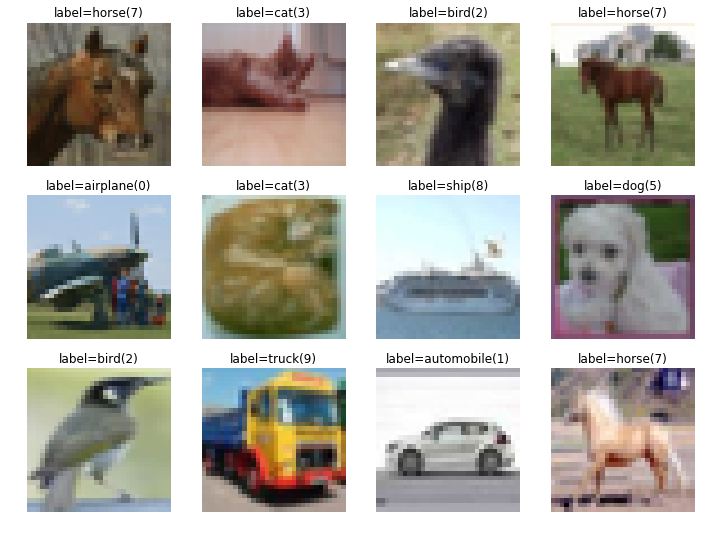

In [103]:
b= dsets[np.random.permutation(len(dsets))[:12]]
print(b)
show_grid(dsets, [img for img,label in b], [f'label={dsets.vocab[label]}({label})' for img,label in b])

In [130]:
img,label= dsets[0]
print(type(img))
# print(dsets.decode((img,label)))
print(type(dsets.decode((img,label))[0]))
# print(dls.valid_ds[0][0])
# print(dls.decode((img,label)))
print(type(dls.decode((img,label))[0]))
print(dls.decode((img,label))[0].shape)
print(dls.decode((img,label))[0].permute((2,0,1)).shape)
print(dls.one_batch()[0].shape)
# print(fastai.vision.all.first(dls.valid)[0].shape)
print(dls.decode((img,label))[0].permute((2,0,1))[0][0])
print(dls.one_batch()[0][0][0][0])

<class 'fastai.vision.core.PILImage'>
<class 'fastai.vision.core.PILImage'>
<class 'fastai.torch_core.TensorImage'>
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([64, 3, 32, 32])
TensorImage([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255])
TensorImage([0.8118, 0.8157, 0.8392, 0.8314, 0.8510, 0.8627, 0.8588, 0.8784, 0.8745,
        0.8824, 0.8627, 0.8471, 0.8627, 0.8824, 0.8980, 0.8980, 0.8980, 0.9020,
        0.8784, 0.8667, 0.8392, 0.8078, 0.7843, 0.7961, 0.8039, 0.8000, 0.8118,
        0.8392, 0.8392, 0.8118, 0.7569, 0.6706], device='cuda:0')


In [ ]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 60000 items
2 datasets of sizes 48000,12000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/akihikoy/.fastai/data/cifar10/train/automobile/48075_automobile.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/akihikoy/.fastai/data/cifar10/train/automobile/48075_automobile.png
    applying parent_label gives
      automobile
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(1))


Found 60000 items
2 datasets of sizes 48000,12000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sor

In [132]:
print(type(dblock.batch_tfms), dblock.batch_tfms)
print(type(dblock.item_tfms), dblock.item_tfms)
print(type(dls.tfms), dls.tfms)

<class 'fastcore.foundation.L'> [IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}:
encodes: (TensorImage,object) -> encodes
(TensorMask,object) -> encodes
decodes: (TensorImage,object) -> decodes
]
<class 'fastcore.foundation.L'> [ToTensor:
encodes: (PILMask,object) -> encodes
(PILBase,object) -> encodes
decodes: ]
<class 'fastcore.foundation.L'> [Pipeline: PILBase.create, Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}]


In [147]:
print(dls.after_item)
print(dls.after_batch)
print(dls.before_batch)

Pipeline: ToTensor
Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}
Pipeline: 


In [162]:
img,label= dsets[0]
# print(dls.decode((img,label))[0].permute((2,0,1))[0][0])
print(dls.after_batch(dls.decode((img,label))[0].permute((2,0,1)))[0][0])
print(dls.after_batch(dls.before_batch(dls.after_item((img,label))))[0][0][0])
print(dls.after_batch(dls.before_batch(dls.after_item(img)))[0][0])

TensorImage([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
TensorImage([0.8157, 0.5098, 0.3804, 0.2431, 0.1882, 0.1725, 0.1686, 0.1647, 0.1804,
        0.1882, 0.2588, 0.3294, 0.3255, 0.3373, 0.5333, 0.6980, 0.7686, 0.7529,
        0.7451, 0.7765, 0.7843, 0.7569, 0.7373, 0.7490, 0.7569, 0.7529, 0.7412,
        0.7686, 0.7725, 0.7686, 0.7608, 0.7569])
TensorImage([0.8157, 0.5098, 0.3804, 0.2431, 0.1882, 0.1725, 0.1686, 0.1647, 0.1804,
        0.1882, 0.2588, 0.3294, 0.3255, 0.3373, 0.5333, 0.6980, 0.7686, 0.7529,
        0.7451, 0.7765, 0.7843, 0.7569, 0.7373, 0.7490, 0.7569, 0.7529, 0.7412,
        0.7686, 0.7725, 0.7686, 0.7608, 0.7569])


### PyTorch Datasets
ref. https://docs.fast.ai/tutorial.siamese.html

In [86]:
import sys
sys.path.insert(0, '../')
from cnn_antbee_1 import AntBeeDataset, GetDataTransforms

In [87]:
# Extend torch dataset to add a show method.
def AntBeeDataset_show(x:AntBeeDataset, o, ctx=None, **kwargs):
    return fastai.vision.all.show_image(o[0].clamp(0,1), title=x.classes[o[1]], ctx=ctx, **kwargs)
AntBeeDataset.show= AntBeeDataset_show

In [88]:
def AntBeeDataset_show_grid(x:AntBeeDataset, imgs, labels, ctxs=None, max_n=12, nrows=None, ncols=3, figsize=None, **kwargs):
    # if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = fastai.vision.all.get_grid(min(len(imgs), max_n), nrows=None, ncols=ncols, figsize=figsize)
    for ctx,img,label in zip(ctxs,imgs,labels):
        x.show((img,label), ctx=ctx)
AntBeeDataset.show_grid= AntBeeDataset_show_grid

In [89]:
N_batch= 20
dataset_train= AntBeeDataset(transform=GetDataTransforms('train'), train=True)
dataset_test= AntBeeDataset(transform=GetDataTransforms('eval'), train=False)
dls= fastai.data.core.DataLoaders.from_dsets(dataset_train, dataset_test, bs=N_batch)

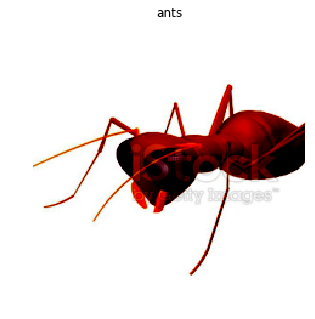

In [90]:
# dataset_train[0][0].clamp(0,1)
fastai.vision.all.show_image(dataset_train[0][0].clamp(0,1), title=dataset_train.classes[dataset_train[0][1]])

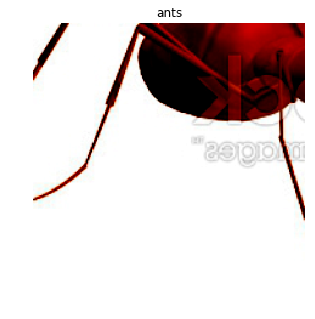

In [91]:
dataset_train.show(dataset_train[0])
# fastai.vision.all.show_image(dataset_train[0][0].clamp(0,1), title=dataset_train.classes[dataset_train[0][1]])

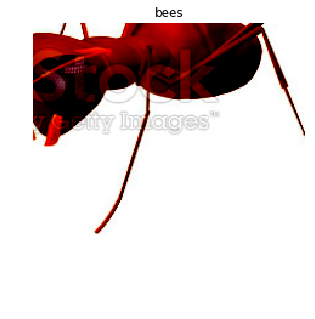

In [92]:
pred_label= 1
dataset_train.show((dataset_train[0][0], pred_label))

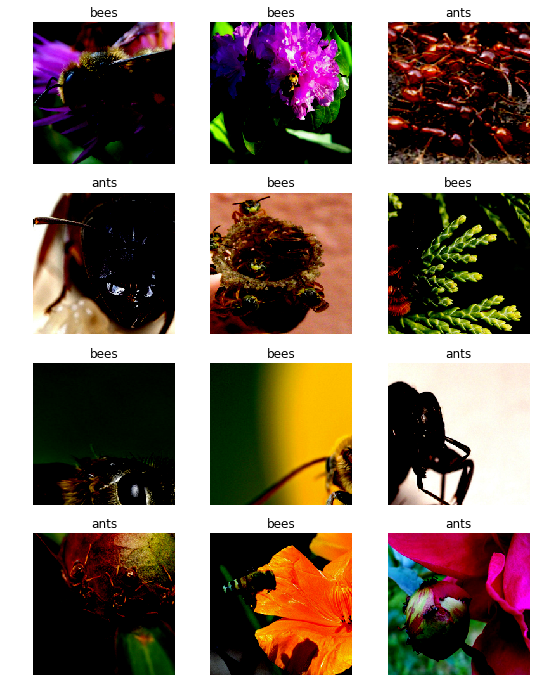

In [93]:
# dls.one_batch()
# b= dls.one_batch()
# fastai.vision.all.show_batch(dls, b, b)
dataset_train.show_grid(*dls.one_batch())

In [96]:
img,label= dataset_train[0]
print(type(img))
# print(dsets.decode((img,label)))
print(type(dsets.decode((img,label))[0]))
# print(dls.decode((img,label)))
print(type(dls.decode((img,label))[0]))
print(dls.decode((img,label))[0].shape)
# print(dls.decode((img,label))[0].permute((2,0,1)).shape)
print(dls.one_batch()[0].shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([3, 224, 224])
torch.Size([20, 3, 224, 224])
